# MCT4001 Scientific Computing in Python Session 7
![mct-banner](https://raw.githubusercontent.com/wiki/MCT-master/Guides/assets/img/mct-banner.jpg)

In [1]:
# enabling auto completion
%config IPCompleter.greedy=True

In [2]:
# importing packages

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import sounddevice as sd
import librosa
import librosa.display
import math
import scipy
import time



# defining funtions that will be used in this notebook

def mySineSynth(freq, dur_ms, amp=1, pha=0, sr=48000):

    t = np.arange(0,dur_ms/1000,1/sr)
    s = amp*np.sin(2*np.pi*freq*t+pha)
    
    return s

def myPlot(signal,title):
    plt.figure(figsize=(12, 3))
    plt.stem(signal, use_line_collection=True)
    plt.grid(True)
    plt.xticks(range(0,signal.size))
    plt.ylim([-1,1])
    plt.title(title)
    plt.show()

def myPlot2(signal,title):
    plt.figure(figsize=(12, 3))
    plt.stem(signal, use_line_collection=True)
    plt.grid(True)
    plt.title(title)
    plt.show()
    
def myPlotCorr(signal,lx,ly,title):
    plt.figure(figsize=(12, 3))
    plt.stem(range(-ly+1,lx),signal, use_line_collection=True)
    plt.grid(True)
    plt.xticks(range(-ly+1,lx))
    plt.title(title)
    plt.show()
    
def mySpectrogram(s,sr,title):
    D = librosa.stft(s)
    DdB = librosa.amplitude_to_db(abs(D))
    plt.figure(figsize=(12, 3))
    librosa.display.specshow(DdB, sr=sr, x_axis='time', y_axis='hz')
    plt.title(title)
    plt.show()

def myWaveform(s,sr,title):
    plt.figure(figsize=(12, 3))
    librosa.display.waveplot(s, sr=sr)
    plt.title(title)
    plt.show()

def myFirResponse(h,sr):
    p, z = scipy.signal.freqz(h)
    p = (p/(2*math.pi))*sr
    fig = plt.figure(figsize=(12, 3))
    plt.title('Digital FIR filter frequency response')
    ax1 = fig.add_subplot(111)
    plt.plot(p, 20 * np.log10(abs(z)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [Hz')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(z))
    plt.plot(p, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()

## 1. Demistyfying Convolution

The output *y(n)* of a Finite Impulse Response (FIR) Linear and Time Invariat (LTI) system with impulrse response *h(n)* and with arbitrary input *x(n)* is computed convolving (i.e. computing the convolution) between *x(n)* and *h(n)*. To simplify the visualization of short signals we use the stem plot.

![LTI](https://www.wisdomjobs.com/userfiles/discrete_convolution.png)


The discrete convolution (for time discrete signals, such as digital audio) is defined as![Conv Formula](https://www.wisdomjobs.com/userfiles/convolution.png)


Where *x(n)* represents the signal, *h(n)* the impulse response of the system, and *y(n)* is the output (result of the convolution).

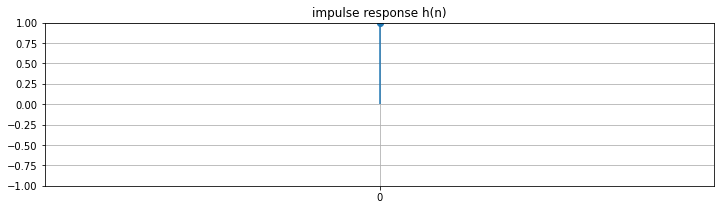

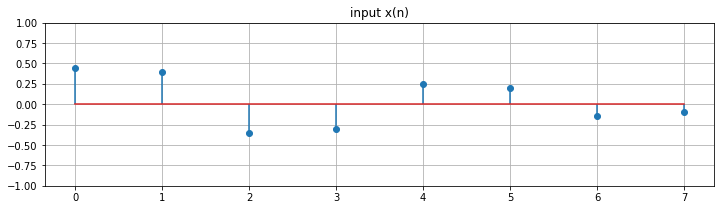

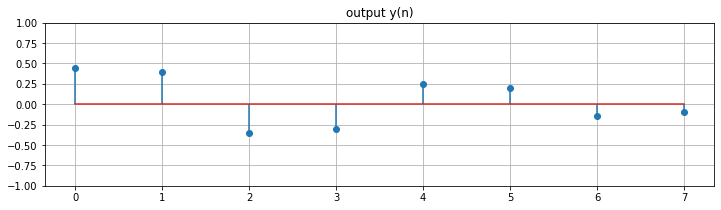

In [3]:
#convolution between a signal and an impulse

# inpulse response
h = np.zeros(1) 
h[0] = 1

# arbitrary input
x = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])

# computing output via convolution
y = np.convolve(x,h)

myPlot(h, 'impulse response h(n)')
myPlot(x, 'input x(n)')
myPlot(y, 'output y(n)')

### Experiment 1
changing the magnitude and sign (polarity of the impulse)

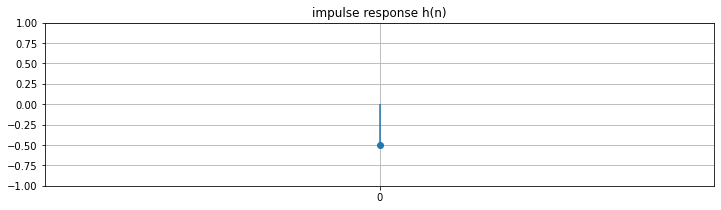

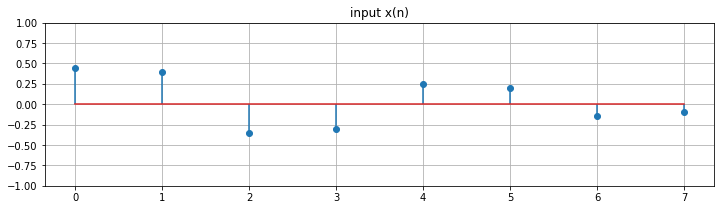

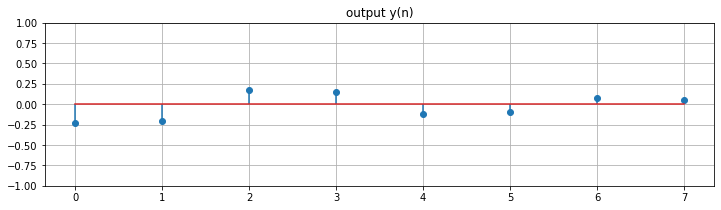

In [4]:
# inpulse response
h = np.zeros(1) 
h[0] = -0.5

# arbitrary input
x = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])

# computing output via convolution
y = np.convolve(x,h)

myPlot(h, 'impulse response h(n)')
myPlot(x, 'input x(n)')
myPlot(y, 'output y(n)')

### Experiment 2

Delaying the impulse

Fact: the lenght (or size) of the convolution is the sum of the lenghts of input and impulse response minus 1

lenght of x(n) 8 lenght of h(n) 10
expected lenght of y(n) is 17 vs actual size of y(n) 17


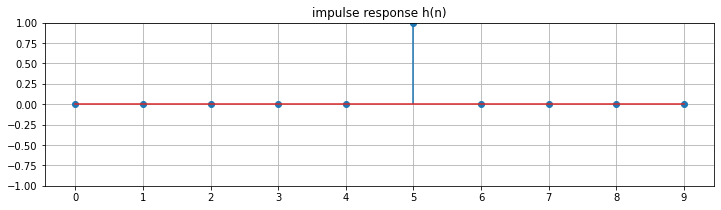

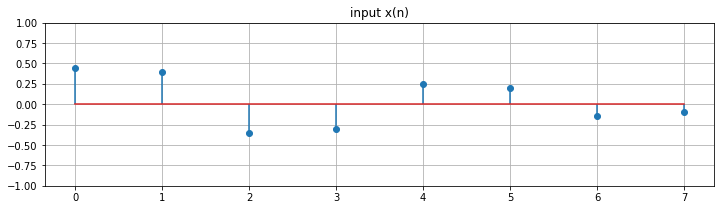

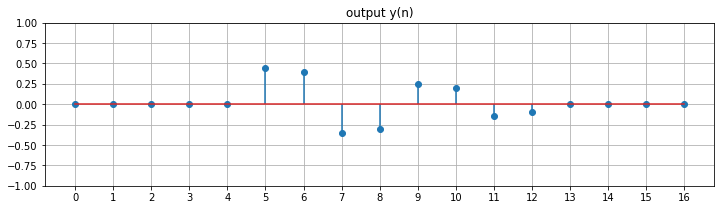

In [5]:
# inpulse response
h = np.zeros(10) 
h[5] = 1

# arbitrary input
x = np.array([0.45, 0.40, -0.35,-0.3, 0.25, 0.2, -0.15, -0.10])

# computing output via convolution
y = np.convolve(x,h)

print('lenght of x(n)',x.size,'lenght of h(n)',h.size)
print('expected lenght of y(n) is',x.size + h.size - 1,'vs actual size of y(n)',y.size)

myPlot(h, 'impulse response h(n)')
myPlot(x, 'input x(n)')
myPlot(y, 'output y(n)')



### Experiment 3

Impulse reponse with multiple impulses

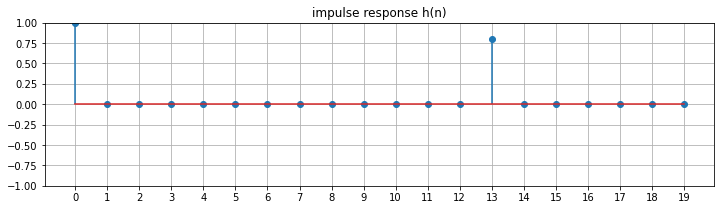

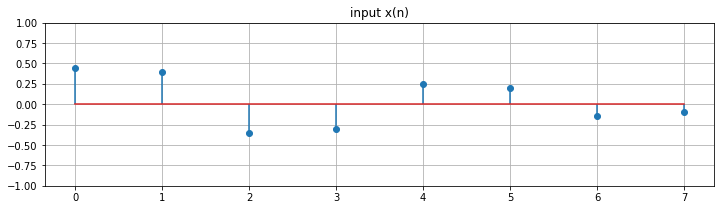

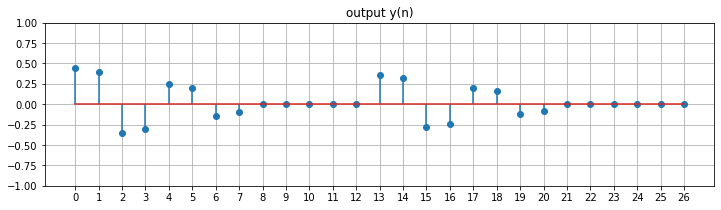

In [6]:
# inpulse response
h = np.zeros(20) 
h[0] = 1
h[13] = 0.8

# arbitrary input
x = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])

# computing output via convolution
y = np.convolve(x,h)

myPlot(h, 'impulse response h(n)')
myPlot(x, 'input x(n)')
myPlot(y, 'output y(n)')

### Experiment 4

Trying with audio (lenght of signals is significantly longer)

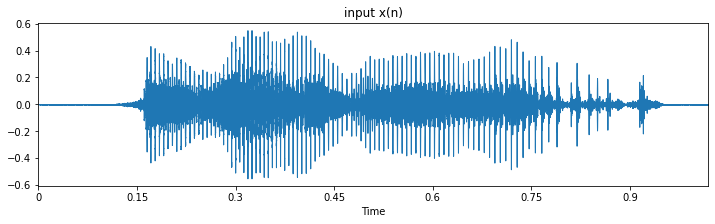

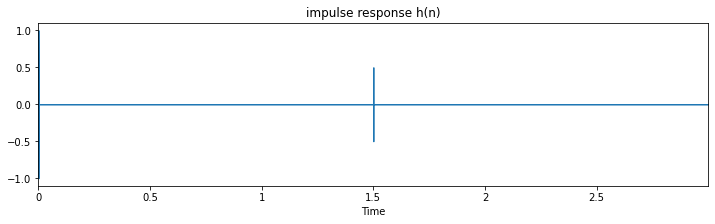

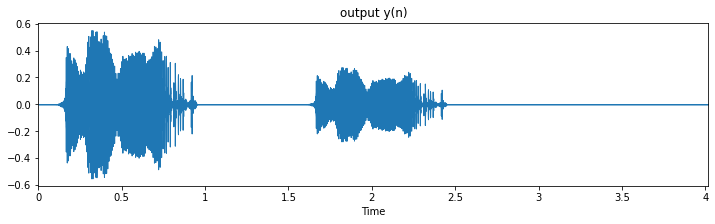

In [7]:
sr = 48000
x, sr = librosa.load('./files/HelloWorld.wav', sr) 
myWaveform(x, sr, 'input x(n)')

h = np.zeros(3*sr) 
h[0] = 1
h[int(1.5*sr)] = 0.5
#for i in range(0,h.size):
#    if i % 6000 == 0:
#        h[i] = (h.size-i)/h.size
    

myWaveform(h, sr, 'impulse response h(n)')

y = np.convolve(x,h)

myWaveform(y, sr, 'output y(n)')


In [8]:
sd.play(x,sr)
sd.wait()
sd.play(h,sr)
sd.wait()
sd.play(y,sr)
sd.wait()


### Experiment 5

Convolution with the recording of an acoustic impulse response

In [9]:
from IPython.display import HTML

HTML('<iframe width="800" height="600" src="https://www.youtube.com/embed/Xsx4VBEKciA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/stefanof/opt/anaconda3/envs/MCT4001/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


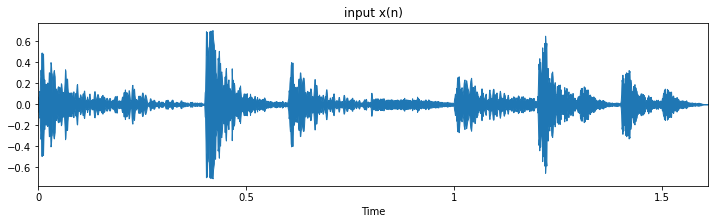

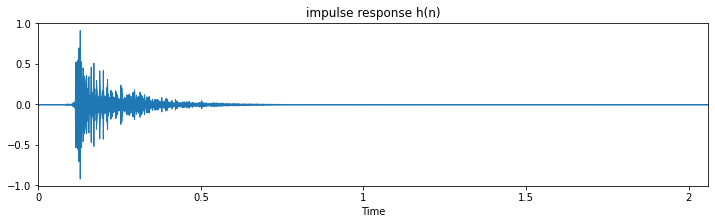

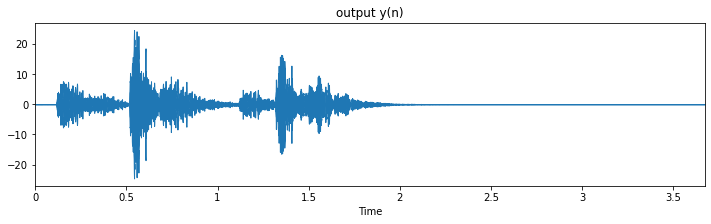

In [10]:
sr = 48000
x, sr = librosa.load('./files/Loop.wav', sr) 
myWaveform(x, sr, 'input x(n)')


h, sr = librosa.load('Files/IR_small_church.wav', sr)    
#h, sr = librosa.load('Files/IR_flanger_space.wav', sr) 
#h, sr = librosa.load('Files/IR_damped_cave.wav', sr)
myWaveform(h, sr, 'impulse response h(n)')

y = np.convolve(x,h)
myWaveform(y, sr, 'output y(n)')

In [11]:
sd.play(x,sr)
sd.wait()
sd.play(h,sr)
sd.wait()
sd.play(y,sr)
sd.wait()


### Experiment 6
working with pure tones and observing their responses 

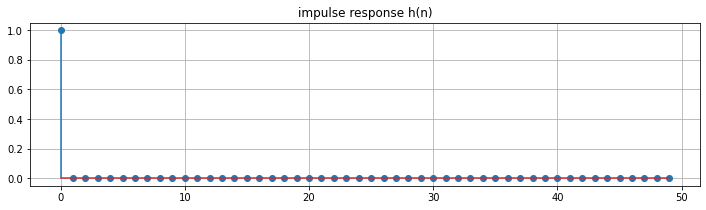

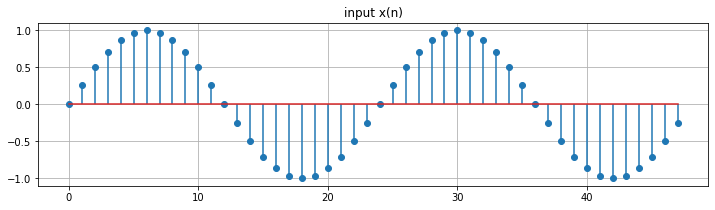

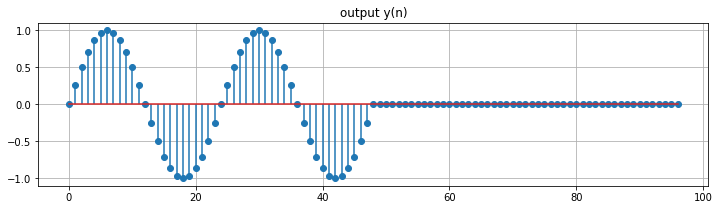

In [12]:
# inpulse response
h = np.zeros(50) 
h[0] = 1
#h[12] = 1

# arbitrary input
x = mySineSynth(2000,1)

# computing output via convolution
y = np.convolve(x,h)

myPlot2(h, 'impulse response h(n)')
myPlot2(x, 'input x(n)')
myPlot2(y, 'output y(n)')

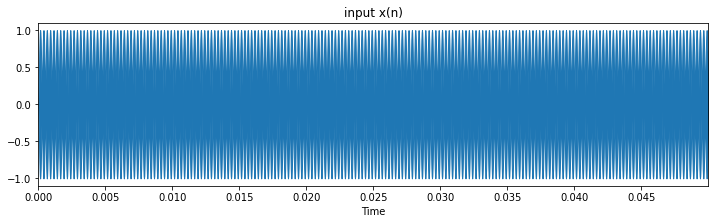

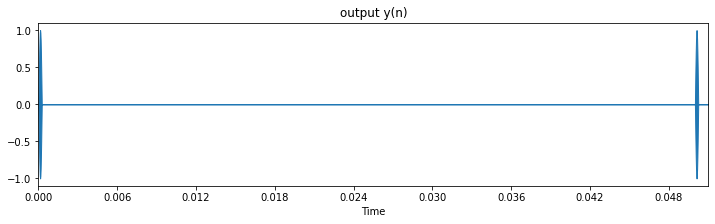

/var/folders/by/m4c7_99d74j70dpnkg3np2r80000gq/T/ipykernel_58661/1300894412.py:68: RuntimeWarning: divide by zero encountered in log10
  plt.plot(p, 20 * np.log10(abs(z)), 'b')


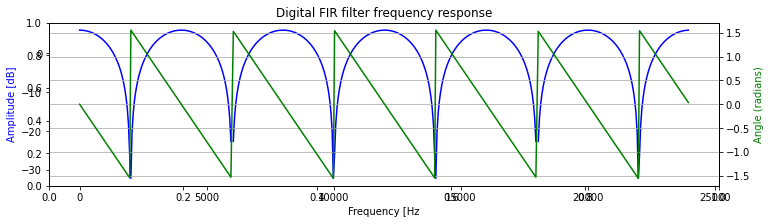

In [13]:
# inpulse response
h = np.zeros(50) 
h[0] = 1
h[12] = 1
h[24] = 0

# arbitrary input
x = mySineSynth(2000,50)

# computing output via convolution
y = np.convolve(x,h)

myWaveform(x,sr,'input x(n)')

myWaveform(y,sr,'output y(n)')

myFirResponse(h,sr)

### Experiment 7
designing FIR filters with http://t-filter.engineerjs.com/

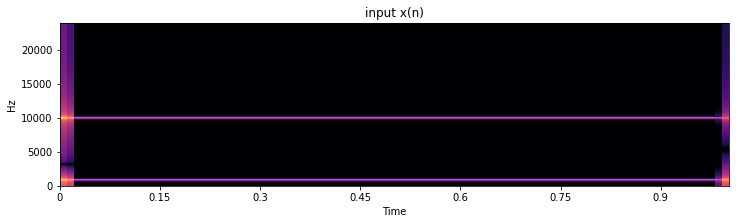

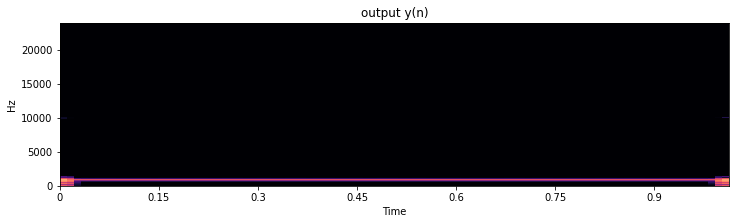

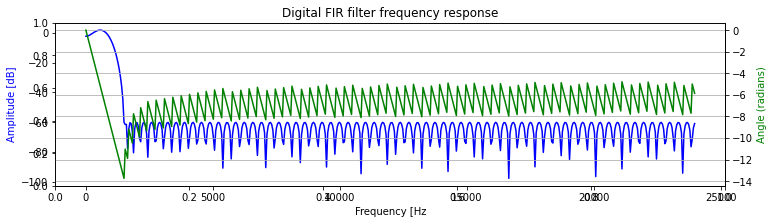

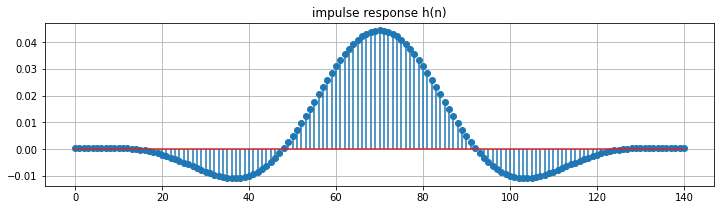

In [14]:
h = np.array([
0.0006221808041488756,
  0.00028894270454767653,
  0.00034629757886828357,
  0.0004031447720575034,
  0.0004570169703737031,
  0.0005050348621890731,
  0.0005439720372092541,
  0.0005702422497921257,
  0.0005800078775637552,
  0.000569173460239569,
  0.0005334687827212263,
  0.0004685682462524707,
  0.00037022508677378305,
  0.00023439856409286178,
  0.00005726303482398194,
  -0.00016442964250060294,
  -0.00043366046979723187,
  -0.000752351993760081,
  -0.0011219400773964298,
  -0.001542595917299643,
  -0.0020135669963603836,
  -0.002532999701748181,
  -0.0030977380512619856,
  -0.0037031521907011926,
  -0.004343384536455574,
  -0.005011105435315143,
  -0.005697656903638683,
  -0.006393062338933975,
  -0.0070859895434657256,
  -0.007763874700433635,
  -0.008413204727937069,
  -0.009019716211248955,
  -0.009568219557576526,
  -0.010043110853036392,
  -0.010428818257556722,
  -0.0107096700767136,
  -0.010870010796820031,
  -0.010895690796178633,
  -0.010772465185021285,
  -0.010488083569404021,
  -0.010031354117957041,
  -0.009393140106932648,
  -0.008566292558014367,
  -0.007545982845176188,
  -0.00632988665678839,
  -0.004918381668809696,
  -0.0033146875873244688,
  -0.0015249308870539673,
  0.00044182222979244703,
  0.002573641142865075,
  0.004855606996274294,
  0.007270578925820993,
  0.00979721044851305,
  0.012415154826822539,
  0.015097300929186227,
  0.0178186107933261,
  0.020551523767944564,
  0.023266428492091578,
  0.025933618785869854,
  0.028523760813644123,
  0.031007546449056532,
  0.03335604761952215,
  0.0355413893792669,
  0.037537402130660445,
  0.0393200269184032,
  0.04086757457644044,
  0.04216101319138014,
  0.04318413447172428,
  0.043924217609847806,
  0.04437195189028101,
  0.044521829514183826,
  0.04437195189028101,
  0.043924217609847806,
  0.04318413447172428,
  0.04216101319138014,
  0.04086757457644044,
  0.0393200269184032,
  0.037537402130660445,
  0.0355413893792669,
  0.03335604761952215,
  0.031007546449056532,
  0.028523760813644123,
  0.025933618785869854,
  0.023266428492091578,
  0.020551523767944564,
  0.0178186107933261,
  0.015097300929186227,
  0.012415154826822539,
  0.00979721044851305,
  0.007270578925820993,
  0.004855606996274294,
  0.002573641142865075,
  0.00044182222979244703,
  -0.0015249308870539673,
  -0.0033146875873244688,
  -0.004918381668809696,
  -0.00632988665678839,
  -0.007545982845176188,
  -0.008566292558014367,
  -0.009393140106932648,
  -0.010031354117957041,
  -0.010488083569404021,
  -0.010772465185021285,
  -0.010895690796178633,
  -0.010870010796820031,
  -0.0107096700767136,
  -0.010428818257556722,
  -0.010043110853036392,
  -0.009568219557576526,
  -0.009019716211248955,
  -0.008413204727937069,
  -0.007763874700433635,
  -0.0070859895434657256,
  -0.006393062338933975,
  -0.005697656903638683,
  -0.005011105435315143,
  -0.004343384536455574,
  -0.0037031521907011926,
  -0.0030977380512619856,
  -0.002532999701748181,
  -0.0020135669963603836,
  -0.001542595917299643,
  -0.0011219400773964298,
  -0.000752351993760081,
  -0.00043366046979723187,
  -0.00016442964250060294,
  0.00005726303482398194,
  0.00023439856409286178,
  0.00037022508677378305,
  0.0004685682462524707,
  0.0005334687827212263,
  0.000569173460239569,
  0.0005800078775637552,
  0.0005702422497921257,
  0.0005439720372092541,
  0.0005050348621890731,
  0.0004570169703737031,
  0.0004031447720575034,
  0.00034629757886828357,
  0.00028894270454767653,
  0.0006221808041488756
 ])

sr = 48000
    
x = 0.3*mySineSynth(880,1000)+0.3*mySineSynth(10000,1000)

y = np.convolve(x,h)

#myWaveform(x,sr,'input x(n)')
mySpectrogram(x, sr, 'input x(n)')

#myWaveform(y,sr,'input y(n)')
mySpectrogram(y, sr, 'output y(n)')

myFirResponse(h, sr)

myPlot2(h, 'impulse response h(n)')


In [15]:
sd.play(x,sr)
sd.wait()
sd.play(h,sr)
sd.wait()
sd.play(y,sr)
sd.wait()

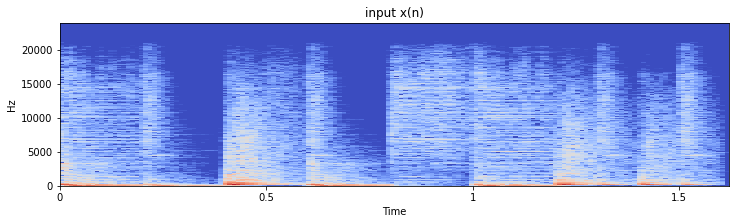

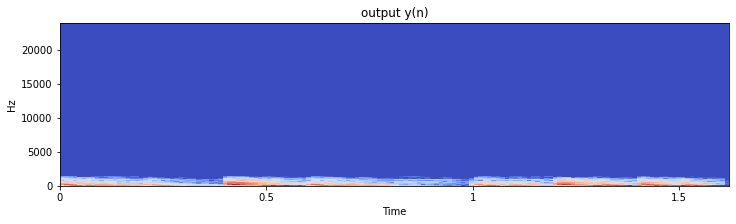

In [16]:
sr = 48000
x, sr = librosa.load('./files/Loop.wav', sr) 

y = np.convolve(x,h)

#myWaveform(x,sr,'input x(n)')
mySpectrogram(x, sr, 'input x(n)')

#myWaveform(y,sr,'input y(n)')
mySpectrogram(y, sr, 'output y(n)')

In [17]:
sd.play(x,sr)
sd.wait()
sd.play(h,sr)
sd.wait()
sd.play(y,sr)
sd.wait()

### Experiment 8
Self convolutiom

In [18]:
sr = 48000
x, sr = librosa.load('Files/HelloWorld.wav', sr) 
#x, sr = librosa.load('Files/Loop.wav', sr) 

y = np.convolve(x,x)
#y = np.convolve(y,x)
#y = np.convolve(y,x)
#y = np.convolve(x,np.flip(x))
y = y / y.max() #normalize level to 1

sd.play(y,sr)
sd.wait()

## 2. Demistyfying Correlation

The correlation *Rxy(l)* between two time discrete signals *x(n)* and *y(n)* is a measureof their similarity as a function of *l* which is a variable time lag between the two signals (i.e. the relative time shift between them). 

The discrete correlation (for time discrete signals, such as digital audio) is defined as![Corr Formula (https://raw.githubusercontent.com/loruro/Ultrasonic_Anemometer/master/img/formulas/cross_correlation.png)

There are many applications for the correlation, such as identification of signals (or patterns) buried in noise, system identification (i.e. find the *h(n)* of an unknown  LTI FIR, etc).

When computed on a signal itself we call it cross correlation *Rxx(l)*, which usually has a maximum for *l=0* (there may be other max values for different values of l). Crosscorrelation  can be used, for instance, to find signal periodicity (or tempo  - for tempo better but more complex approaches have  been proposed).


lenght of x(n) 8 lenght of y(n) 8
expected lenght of Rxy(l) is 15 vs actual size of y(n) 15


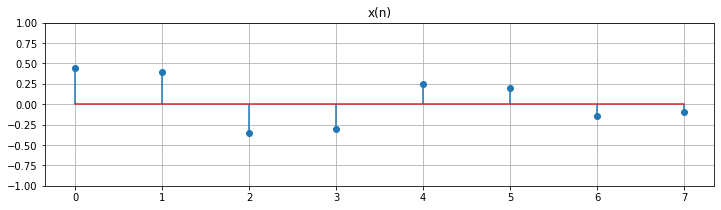

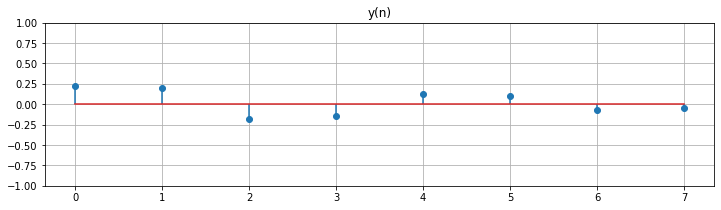

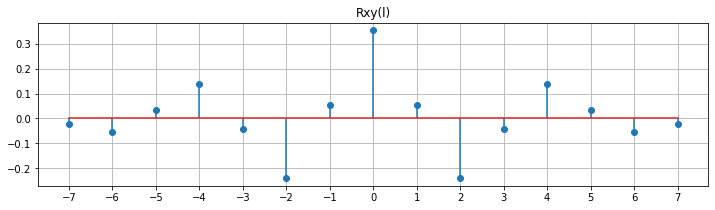

In [19]:
#correlation between signals

# signals
x = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])
y = np.array([0.225, 0.20, -0.175, -0.15, 0.125, 0.1, -0.075, -0.05])
#y = np.array([-0.45, -0.40, 0.35, 0.3, -0.25, -0.2, 0.15, 0.10])
#y = np.array([0, 0, 0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])
#y = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])


# computing correlation
r = np.correlate(y,x,'full')

print('lenght of x(n)',x.size,'lenght of y(n)',y.size)
print('expected lenght of Rxy(l) is',x.size + y.size - 1,'vs actual size of y(n)',r.size)

myPlot(x, 'x(n)')
myPlot(y, 'y(n)')
myPlotCorr(r,x.size,y.size,'Rxy(l)')

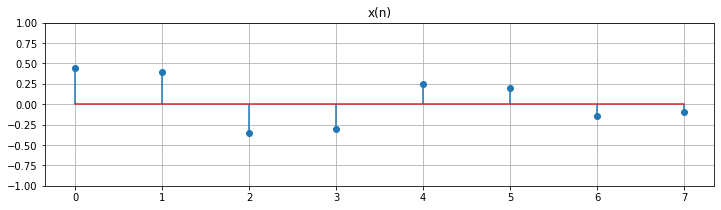

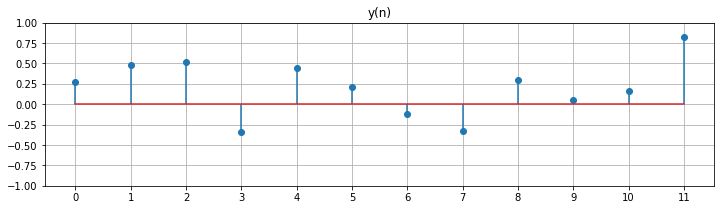

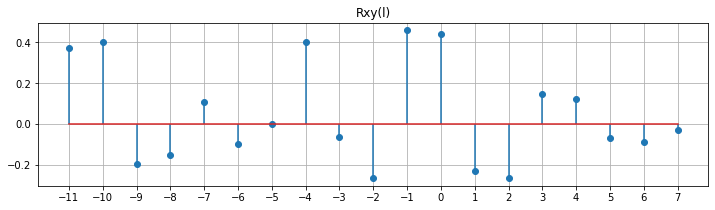

In [20]:
#finding signal buried in noise  via  correlation

# signal
x = np.array([0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])

# same signal  delayed and buried in noise
y = np.array([0, 0, 0, 0, 0.45, 0.40, -0.35, -0.3, 0.25, 0.2, -0.15, -0.10])
y = y + 0.4*np.random.randn(y.size)

# computing correlation
r = np.correlate(x,y,'full')

myPlot(x, 'x(n)')
myPlot(y, 'y(n)')
myPlotCorr(r,x.size,y.size,'Rxy(l)')

<IPython.core.display.Javascript object>


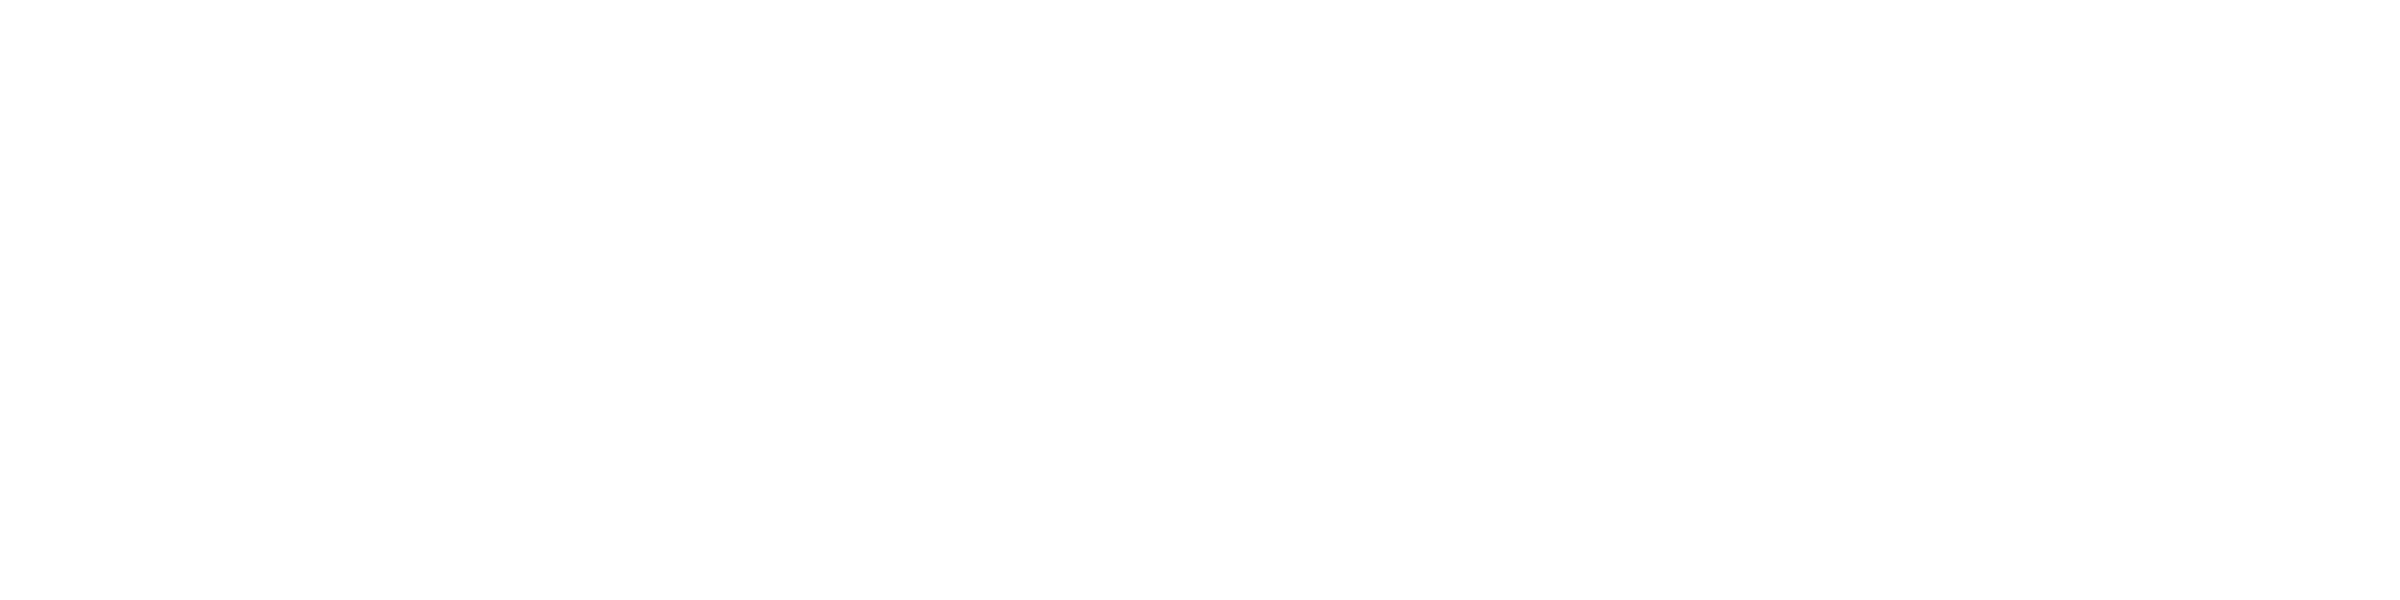

<IPython.core.display.Javascript object>


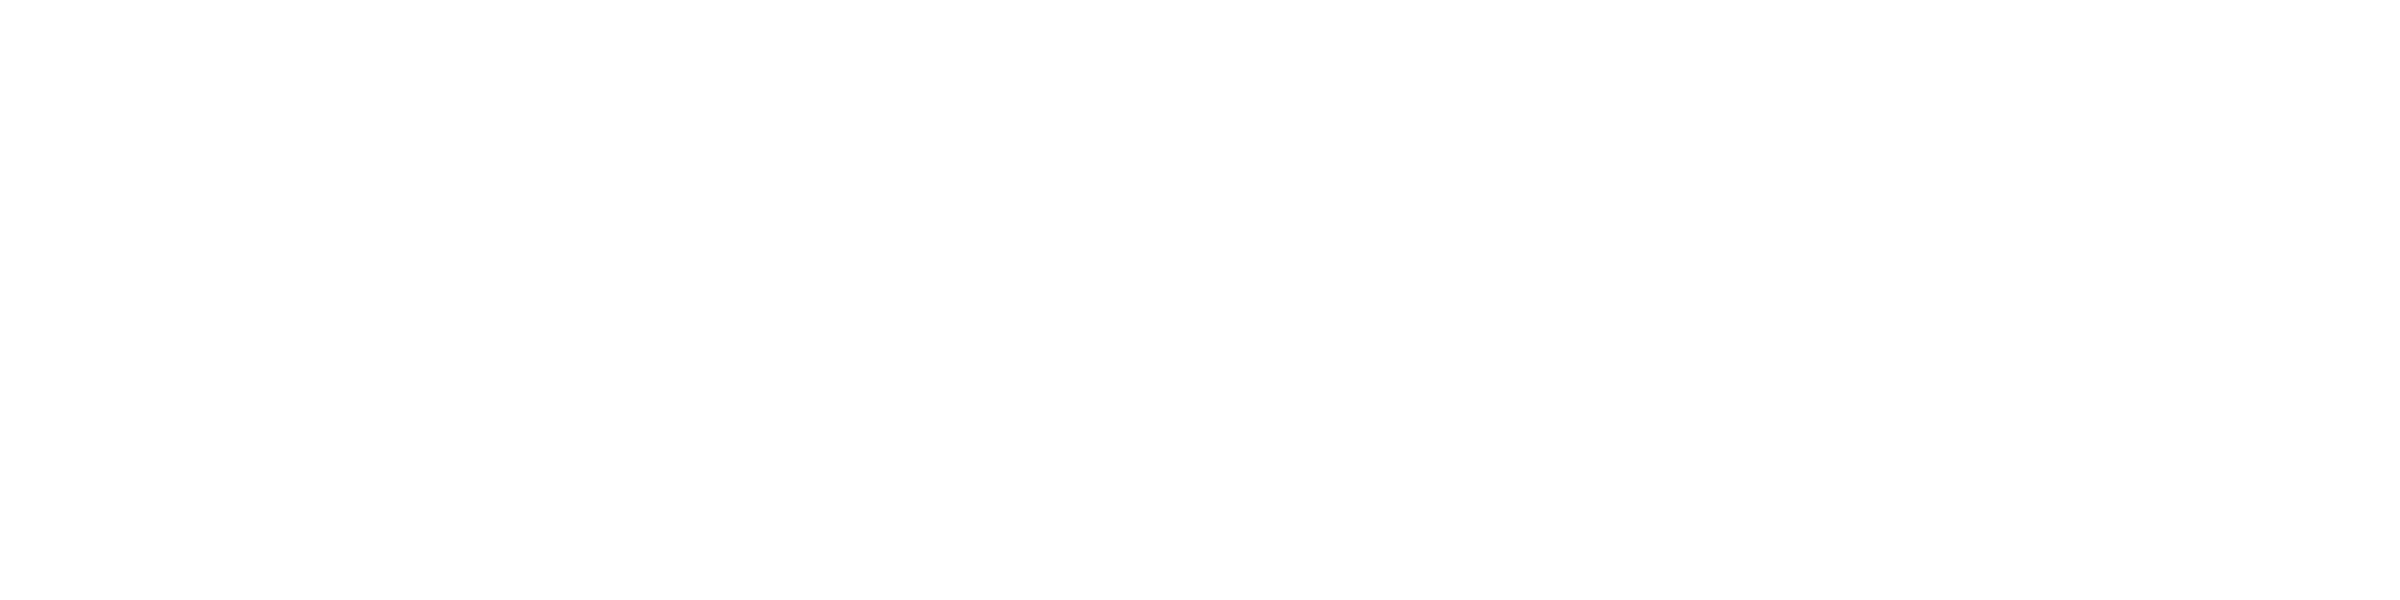

In [21]:
%matplotlib notebook

# periodic signal
x = 0.3*mySineSynth(2000,1)
#x = x  + 0.2*np.random.randn(x.size) #adding noise

# computing autocorrelation
r = np.correlate(x,x,'full')

myPlot(x, 'x(n)')
myPlotCorr(r,x.size,x.size,'Rxx(l)')

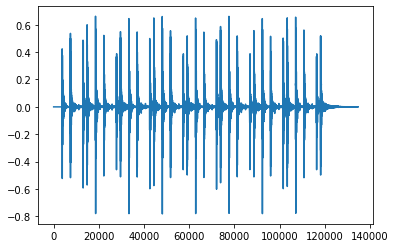

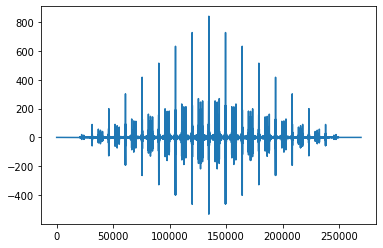

In [22]:
# periodic signal
x, sr = librosa.load('./files/Drums.wav', sr=8000) 

%matplotlib inline

# computing autocorrelation
r = np.correlate(x,x,'full')

plt.plot(x)
plt.show()
plt.plot(r)
plt.show()

In [23]:
sd.play(x,sr)
sd.wait()
